In [68]:
import matplotlib.pyplot as plt
import numpy as np

In [69]:
# IMPORTACIÓN SOLUCIÓN
# BASE =
# IDEAL = 
# ESPERADO = 

# BASE_MODIFICADO = 
# IDEAL_MODIFICADO = 
# ESPERADO_MODIFICADO = 

## Formato soluciones
Para poder analizar los resultados trabajaremos con varios vectores con distintas soluciones según los datos iniciales.

El formato de los vectores solución consiste en un array con los siguientes datoses el siguiente:

| Indice | Valor | Rango |
|--------|-------|-------
| 0 | x = Cantidad de puestos de atención | 3-5  | 
| 1 | y = Cantidad de boxes de atención | 5-8  |
| 2 | z1= Cantidad de camas en la sala DIV101_603 |  12-15 |
| 3 | z2= Cantidad de camas en las sala DIV101_604 | 5-6 |
| 4 | z3 = Cantidad de camas en las sala DIV101_703 | 5-8|
| 5 | z4 = Cantidad de camas en las sala DIV102_203 | 12-15 |
| 6 | z5 = Cantidad de camas en las sala DIV103_107 | 8-10 |
| 7 | z6 = Cantidad de camas en las sala DIV103_204 | 10-13 |
| 8 | z7 = Cantidad de camas en las sala DIV104_602 |14-18 |
| 9 | e = Disponibilida de la sala OPR101_011  | 0-1 |



In [70]:
costos_operacionales = {
    'puesto_antencion': 150000, 
    'box_atencion': 450000,
    'cama': 250000,
    'horario_OPR101_011': 800000}

costos_inversion = {
    'box_atencion': 12500000,
    'cama': 3500000,
    'horario_OPR101_011': 25000000
}

# Escenarios
Se procede a comparar los resultados de distintas soluciones 

### Escenario base
* Llegada de pacientes: “registro histórico”
* Ruta de pacientes: “registro histórico”
* Presupuesto: 0

In [71]:
#lead_time_base = 
base = np.array([3, 5, 12, 5, 5, 12, 8, 10, 14, 0])
lead_time_base_range = (200, 300)

### Escenario Ideal
* Llegada de pacientes: “registro histórico”
* Ruta de pacientes: “registro histórico”
* Presupuesto: infinito

In [72]:
# lead_time_ideal =
ideal = np.array([5, 8, 15, 6, 8, 15, 10, 13, 18, 1])
lead_time_ideal_range = (50, 100)

### Escenario Esperado
* Llegada de pacientes: “registro histórico”
* Ruta de pacientes: “registro histórico”
* Presupuesto: propuesto por equipo docente


In [73]:
# lead_time_esperado = 
esperado = np.array([5, 8, 12, 6, 2, 12, 10, 10, 15, 0]) # Inventado para testear
lead_time_esperado_range = (100, 200)

## Análisis inicial

In [76]:
def calcular_costos(base, solucion, costos_op, costos_inv):
    costo_op = 0
    costo_inv = 0
    costo_op += (solucion[0] - base[0]) * costos_op['puesto_antencion']
    costo_op += (solucion[1] - base[1])* costos_op['box_atencion']
    costo_inv += (solucion[1] - base[1])* costos_inv['box_atencion']
    for i in range(2,9):
        costo_op += (solucion[i] - base[i])* costos_op['cama']
        costo_inv += (solucion[i] - base[i])* costos_inv['cama']
    
    costo_op += solucion[9] * costos_op['horario_OPR101_011']
    costo_inv += solucion[9]* costos_inv['horario_OPR101_011']
    return costo_op, costo_inv

In [77]:
print(calcular_costos(base, ideal, costos_operacionales, costos_inversion))
print(calcular_costos(base, esperado, costos_operacionales, costos_inversion))

(7200000, 129000000)
(1900000, 41000000)


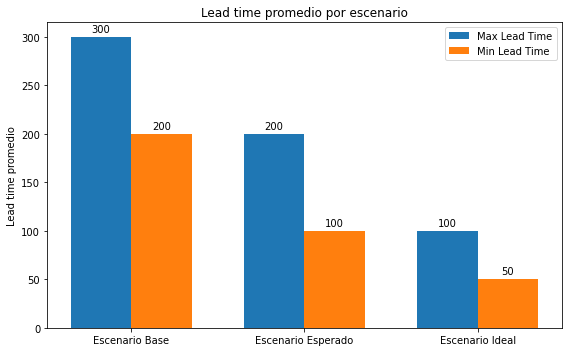

In [ ]:
labels = ['Escenario Base', 'Escenario Esperado', 'Escenario Ideal']
max_leadtime = [lead_time_base_range[1], 
                lead_time_esperado_range[1], 
                lead_time_ideal_range[1]]

min_leadtime = [lead_time_base_range[0], 
                lead_time_esperado_range[0], 
                lead_time_ideal_range[0]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, max_leadtime, width, label='Max Lead Time')
rects2 = ax.bar(x + width/2, min_leadtime, width, label='Min Lead Time')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Lead time promedio')
ax.set_title('Lead time promedio por escenario')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=labels,
                       open=min_leadtime, high=max_leadtime,
                       low=min_leadtime, close=max_leadtime)])

fig.update_layout(title = "Rangos Lead Time promedio según escenario")
fig.update_xaxes(title_text='Escenario')
fig.update_yaxes(title_text='Lead time promedio')
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


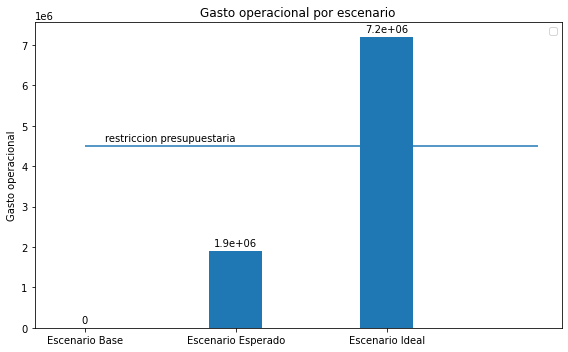

In [107]:
labels = ['Escenario Base', 'Escenario Esperado', 'Escenario Ideal']

op_base = calcular_costos(base, base, costos_operacionales, costos_inversion)[0]
op_ideal = calcular_costos(base, ideal, costos_operacionales, costos_inversion)[0]
op_esperado = calcular_costos(base, esperado, costos_operacionales, costos_inversion)[0]

max_leadtime = [op_base, op_esperado, op_ideal]

x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x, max_leadtime, width, label='')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gasto operacional')
ax.set_title('Gasto operacional por escenario')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
plt.hlines(4500000, xmin=0, xmax=3, label='Restricción')
plt.text(1, 4700000, 'restriccion presupuestaria', ha='right', va='center')

fig.tight_layout()

plt.show()

### Escenario base - Sensibilidad de llegada de pacientes
* Llegada de pacientes: “registro histórico” + valor por determinar
* Ruta de pacientes: “registro histórico”
* Presupuesto: 0


### Escenario Ideal - Sensibilidad de llegada de pacientes
* Llegada de pacientes: “registro histórico” + valor por determinar
* Ruta de pacientes: “registro histórico”
* Presupuesto: Infinito


### Escenario Esperado - Sensibilidad de llegada de pacientes
* Llegada de pacientes: “registro histórico” + valor por determinar
* Ruta de pacientes: “registro histórico”
* Presupuesto: propuesto por equipo docente
